### PROBLEM STATEMENT

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## DATA 

### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# EDA

In [2]:
customertraindata=pd.read_csv("train.csv")

In [3]:
customertraindata.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
customertestdata=pd.read_csv("test.csv")

In [5]:
customertestdata.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
#customertestdata=customertestdata.drop_duplicates(keep='first')


In [7]:
#customertestdata[customertestdata.duplicated()]

In [8]:
#customertraindata=customertraindata.drop_duplicates(keep='first')
#customertraindata[customertraindata.duplicated()]

In [9]:
print(customertraindata.shape) # traindata having 550068 records and 12 features includes target variable
print(customertestdata.shape) # testdata having 233599 records and 11 features does not includes target variable

(550068, 12)
(233599, 11)


In [10]:
customertraindata.dtypes  # datatypes are int,object,float

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [11]:
customertestdata.dtypes  # datatypes are int,object,float

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [12]:
# checking for missing value for train data
customertraindata.isnull().sum().sort_values(ascending=False)  # Product_Category_3(69.6%) and Product_Category_2(31.5%) having more missing values

Product_Category_3            383247
Product_Category_2            173638
Purchase                           0
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
Product_ID                         0
User_ID                            0
dtype: int64

In [13]:
# checking for missing value for test data
customertestdata.isnull().sum().sort_values(ascending=False)  # Product_Category_3(69.5%) and Product_Category_2(30.9%) having more missing values

Product_Category_3            162562
Product_Category_2             72344
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
Product_ID                         0
User_ID                            0
dtype: int64

In [14]:
customertraindata.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [15]:
customertestdata.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

As both dataset have missing value in same features so we can concat both dataset customertraindata & customertestdata for data preprocessing and remove missing values. In order to concat datasaet column's should be same hence we need to remove purchase columns from train dataset.

In [16]:
customertraindata1=customertraindata.drop('Purchase',axis=1)

In [17]:
customertraindata1.columns  # we can see Purchase column is not there now.

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [18]:
#Let's combine customertestdata and customertraindata1

In [19]:
combinecustomerdata=pd.concat([customertraindata1,customertestdata],axis=0)

In [20]:
combinecustomerdata.isnull().sum().sort_values(ascending=False)

Product_Category_3            545809
Product_Category_2            245982
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
Product_ID                         0
User_ID                            0
dtype: int64

Now we have combinecustomerdata dataset which is combination of train and test data and we will be performing Data preprocessing on this dataset and after that we will separate.

Separate Object and numerical datatype and then accordingly perform operation to remove missing value.

In [21]:
#combinecustomerdata[combinecustomerdata.duplicated()]

In [22]:
combinecustomerdata_object=combinecustomerdata.select_dtypes(include='object')
combinecustomerdata_numerical=combinecustomerdata.select_dtypes(include='number')

In [23]:
print(combinecustomerdata_object.columns)

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')


In [24]:
print(combinecustomerdata_numerical.columns)

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')


## Handling Missing values for Categorical variable

In [25]:
combinecustomerdata_object.head()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+


In [26]:
combinecustomerdata_object.isnull().sum().sort_values(ascending=False)

Stay_In_Current_City_Years    0
City_Category                 0
Age                           0
Gender                        0
Product_ID                    0
dtype: int64

we can see in categorical variables there are no missing values hence we will keep it as it is.

## Handling Missing values for Numerical variable

In [27]:
combinecustomerdata_numerical.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,10,0,3,NaN,NaN
1,1000001,10,0,1,6.0,14.0
2,1000001,10,0,12,NaN,NaN
3,1000001,10,0,12,14.0,NaN
4,1000002,16,0,8,NaN,NaN


In [28]:
combinecustomerdata_numerical.isnull().sum().sort_values(ascending=False)

Product_Category_3    545809
Product_Category_2    245982
Product_Category_1         0
Marital_Status             0
Occupation                 0
User_ID                    0
dtype: int64

In [29]:
#Let's check importance of these feature Product_Category_2 and Product_Category_3 
#we will add another feature if value is present then update it as 1 and if it is NaN update it as 0 for checking variable importance .

In [30]:
combinecustomerdata_numerical['Product_Category_2_test'] = np.where(combinecustomerdata_numerical['Product_Category_2'].isnull(), 0, 1)
combinecustomerdata_numerical['Product_Category_3_test'] = np.where(combinecustomerdata_numerical['Product_Category_3'].isnull(), 0, 1)

<ipython-input-30-5b6f51fc66fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combinecustomerdata_numerical['Product_Category_2_test'] = np.where(combinecustomerdata_numerical['Product_Category_2'].isnull(), 0, 1)
<ipython-input-30-5b6f51fc66fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combinecustomerdata_numerical['Product_Category_3_test'] = np.where(combinecustomerdata_numerical['Product_Category_3'].isnull(), 0, 1)


In [31]:
print('count of  0 consider as nan value in Product_Category_2_test :{}'.format(combinecustomerdata_numerical['Product_Category_2_test'].value_counts()[0]))
print('count of  0 consider as nan value in Product_Category_3_test:{}'.format(combinecustomerdata_numerical['Product_Category_3_test'].value_counts()[0]))

count of  0 consider as nan value in Product_Category_2_test :245982
count of  0 consider as nan value in Product_Category_3_test:545809


<AxesSubplot:xlabel='Product_Category_2_test', ylabel='count'>

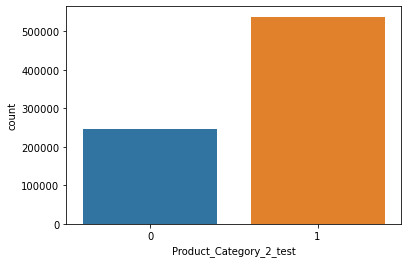

In [32]:
sns.countplot(x='Product_Category_2_test',data=combinecustomerdata_numerical)  # in Product_Category_2_test nan values are less 

<AxesSubplot:xlabel='Product_Category_3_test', ylabel='count'>

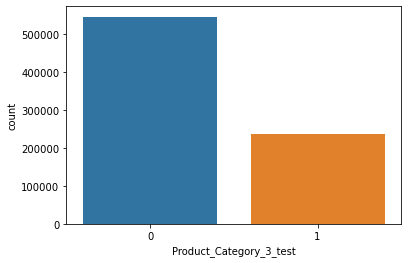

In [33]:
sns.countplot(x='Product_Category_3_test',data=combinecustomerdata_numerical)# nan values are in large number

check the correlation of both feature with target variable and check whether these feature are important or not.

In [34]:
combinecustomerdata_numerical.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_Category_2_test,Product_Category_3_test
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,783667.000000,783667.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,0.686114,0.303519
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,0.464071,0.459778
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000,0.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,0.000000,0.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,1.000000,0.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,1.000000,1.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,1.000000,1.000000


<AxesSubplot:xlabel='Product_Category_3', ylabel='Count'>

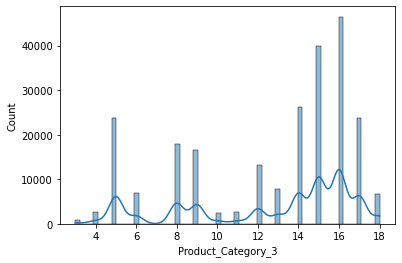

In [35]:
sns.histplot(x='Product_Category_3',data=combinecustomerdata_numerical,kde=True)

In [36]:
combinecustomerdata_numerical.drop(['Product_Category_2_test','Product_Category_3_test'],axis=1,inplace=True)

C:\Users\BNB\Anaconda3\envs\myEnv\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
from sklearn.impute import SimpleImputer

In [38]:
imputer=SimpleImputer(missing_values=np.nan,
                            strategy='median')

In [39]:
combinecustomerdata_numerical_imputer=imputer.fit_transform(combinecustomerdata_numerical)

In [40]:
numericlabels=combinecustomerdata_numerical.select_dtypes(include=np.number).columns

In [41]:
combinecustomerdata_numerical_final=pd.DataFrame(combinecustomerdata_numerical_imputer,columns=numericlabels)

In [42]:
combinecustomerdata_numerical_final.head()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001.0,10.0,0.0,3.0,9.0,14.0
1,1000001.0,10.0,0.0,1.0,6.0,14.0
2,1000001.0,10.0,0.0,12.0,9.0,14.0
3,1000001.0,10.0,0.0,12.0,14.0,14.0
4,1000002.0,16.0,0.0,8.0,9.0,14.0


In [43]:
combinecustomerdata_numerical_final.isnull().sum()

User_ID               0
Occupation            0
Marital_Status        0
Product_Category_1    0
Product_Category_2    0
Product_Category_3    0
dtype: int64

In [44]:
#dropping user id and Customer id from combinecustomerdata_object and combinecustomerdata_numerical_final dataset
combinecustomerdata_object.drop('Product_ID',axis=1,inplace=True)
combinecustomerdata_numerical_final.drop('User_ID',axis=1,inplace=True)

C:\Users\BNB\Anaconda3\envs\myEnv\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Handling Categorical Feature

In [45]:
combinecustomerdata_object.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years
0,F,0-17,A,2
1,F,0-17,A,2
2,F,0-17,A,2
3,F,0-17,A,2
4,M,55+,C,4+


In [46]:
for col in combinecustomerdata_object.columns:
    print(col)
    print(combinecustomerdata_object[col].value_counts())
    


Gender
M    590031
F    193636
Name: Gender, dtype: int64
Age
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64
City_Category
B    329739
C    243684
A    210244
Name: City_Category, dtype: int64
Stay_In_Current_City_Years
1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64


In [47]:
#Feature gender and City_Category has changed to numerical using get_dummies
combinecustomerdata_object=pd.get_dummies(combinecustomerdata_object,columns=['Gender','City_Category'],drop_first=True)

In [48]:
#Converting Stay_In_Current_City_Years into same just remove 4+ with 4
combinecustomerdata_object['Stay_In_Current_City_Years']=np.where(combinecustomerdata_object['Stay_In_Current_City_Years']=='4+',4,combinecustomerdata_object['Stay_In_Current_City_Years'])

In [49]:
#Converting Stay_In_Current_City_Years datatype as numerical
combinecustomerdata_object['Stay_In_Current_City_Years']=combinecustomerdata_object['Stay_In_Current_City_Years'].astype('int64')

C:\Users\BNB\Anaconda3\envs\myEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

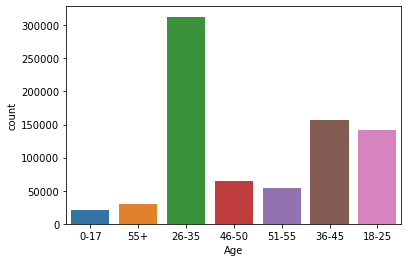

In [50]:
sns.countplot('Age',data=combinecustomerdata_object)

#combinecustomerdata_object.iloc[4]['Age'].split('-')
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334

In [51]:
combinecustomerdata_object['Age']=np.where(combinecustomerdata_object['Age']=='26-35',30.5,combinecustomerdata_object['Age'])
combinecustomerdata_object['Age']=np.where(combinecustomerdata_object['Age']=='36-45',40.5,combinecustomerdata_object['Age'])
combinecustomerdata_object['Age']=np.where(combinecustomerdata_object['Age']=='18-25',21.5,combinecustomerdata_object['Age'])
combinecustomerdata_object['Age']=np.where(combinecustomerdata_object['Age']=='46-50',48,combinecustomerdata_object['Age'])
combinecustomerdata_object['Age']=np.where(combinecustomerdata_object['Age']=='51-55',53,combinecustomerdata_object['Age'])
combinecustomerdata_object['Age']=np.where(combinecustomerdata_object['Age']=='55+',55,combinecustomerdata_object['Age'])
combinecustomerdata_object['Age']=np.where(combinecustomerdata_object['Age']=='0-17',8.5,combinecustomerdata_object['Age'])

In [52]:
combinecustomerdata_object['Age']=combinecustomerdata_object['Age'].astype('int64')

In [53]:
combinecustomerdata_object.head(10)

,Age,Stay_In_Current_City_Years,Gender_M,City_Category_B,City_Category_C
0,8,2,0,0,0
1,8,2,0,0,0
2,8,2,0,0,0
3,8,2,0,0,0
4,55,4,1,0,1
5,30,3,1,0,0
6,48,2,1,1,0
7,48,2,1,1,0
8,48,2,1,1,0
9,30,1,1,0,0


In [54]:
combinecustomerdata_object.columns

Index(['Age', 'Stay_In_Current_City_Years', 'Gender_M', 'City_Category_B',
       'City_Category_C'],
      dtype='object')

In [55]:
combinecustomerdata_numerical_final.columns

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [56]:
#Combine both Categorical and Numerical Features 
print(combinecustomerdata_object.shape)
print(combinecustomerdata_numerical_final.shape)

(783667, 5)
(783667, 5)


In [57]:
combinecustomerdata_object.reset_index(drop=True, inplace=True)
combinecustomerdata_numerical_final.reset_index(drop=True, inplace=True)

In [58]:
combinecustomerdata_object.isnull().sum()

Age                           0
Stay_In_Current_City_Years    0
Gender_M                      0
City_Category_B               0
City_Category_C               0
dtype: int64

In [59]:
combinecustomerdata_numerical_final.isnull().sum()

Occupation            0
Marital_Status        0
Product_Category_1    0
Product_Category_2    0
Product_Category_3    0
dtype: int64

In [60]:
combinecustomerfinal=pd.concat([combinecustomerdata_object,combinecustomerdata_numerical_final],axis=1)

In [61]:
combinecustomerfinal.isnull().sum()

Age                           0
Stay_In_Current_City_Years    0
Gender_M                      0
City_Category_B               0
City_Category_C               0
Occupation                    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [62]:
combinecustomerfinal.dtypes

Age                             int64
Stay_In_Current_City_Years      int64
Gender_M                        uint8
City_Category_B                 uint8
City_Category_C                 uint8
Occupation                    float64
Marital_Status                float64
Product_Category_1            float64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [63]:
print(customertraindata.shape) # no of rows in train data is 550068
print(customertestdata.shape)  # no of rows in test data is 233599


(550068, 12)
(233599, 11)


In [64]:
233599+550068  #hence total is 783667 which is same as preseent in combinecustomerfinal

783667

In [65]:
combinecustomerfinal.shape

(783667, 10)

In [66]:
combinecustomerfinal.columns

Index(['Age', 'Stay_In_Current_City_Years', 'Gender_M', 'City_Category_B',
       'City_Category_C', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [67]:
columuns=['Age', 'Stay_In_Current_City_Years', 'Gender_M', 'City_Category_B',
       'City_Category_C', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']

In [68]:
# Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaleddata=scaler.fit_transform(combinecustomerfinal)

In [69]:
combinecustomerfinal1=pd.DataFrame(scaleddata,columns=columuns)

hence we have now combinecustomerfinal dataset which is final after handling Missing values and categorical variables

In [70]:
customerfinaltraindataset=combinecustomerfinal1.iloc[:550068]
print(customerfinaltraindataset.shape)
customerfinaltestdataset=combinecustomerfinal1.iloc[550068:783667]
print(customerfinaltestdataset.shape)

(550068, 10)
(233599, 10)


In [71]:
y=customertraindata.Purchase  # Single Dependent Variable(y) - y lower case
X=customerfinaltraindataset  # Single Dependent Variable(y) - y lower case
 # Independent Variables df (X) - X Upper Case

In [72]:
X_feature=X[['Age', 'Stay_In_Current_City_Years', 'Gender_M', 'City_Category_B',
       'City_Category_C', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']]

{'whiskers': [<matplotlib.lines.Line2D at 0x1efdc6cb220>,
 'caps': [<matplotlib.lines.Line2D at 0x1efdc6cb910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1efdc6bfe80>],
 'medians': [<matplotlib.lines.Line2D at 0x1efdc6cbfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1efdc6d1370>],
 'means': []}

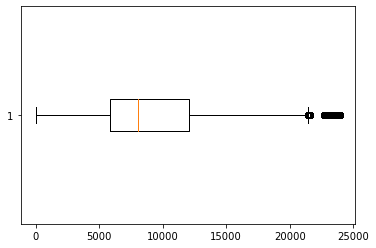

In [73]:
#plt.hist('Purchase',data=customertraindata)
plt.boxplot('Purchase',vert=False,data=customertraindata)

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
linreg=LinearRegression()

In [76]:
linreg.fit(X_feature,y)

LinearRegression()

In [77]:
linreg.score(X_feature,y)

0.12704815895205368

In [78]:
y_pred=linreg.predict(X_feature)

In [79]:
LinRegResidual=y-y_pred # Residual

## Feature Selection

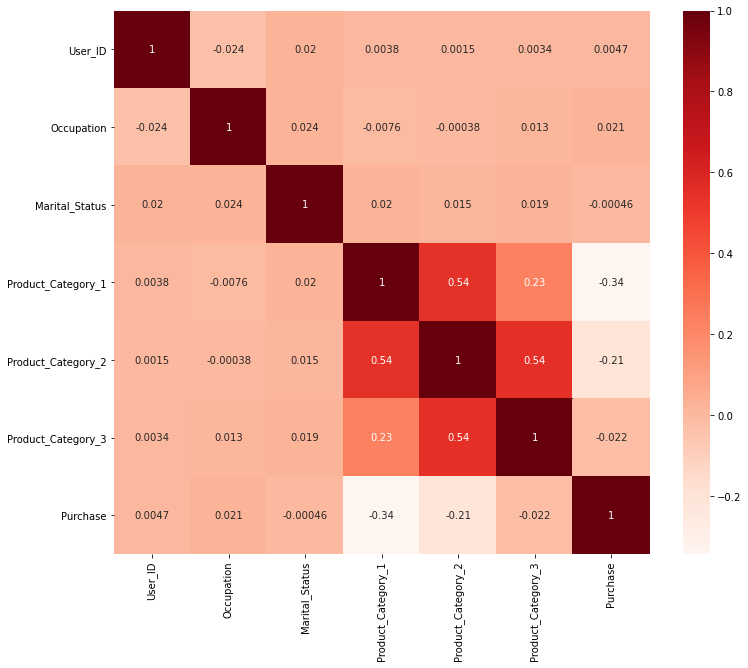

In [80]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = customertraindata.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [81]:
#Feature Selection using Wrapper Method--eg backword selection

In [82]:
from sklearn.feature_selection import RFE
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

C:\Users\BNB\Anaconda3\envs\myEnv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Index(['Age', 'Stay_In_Current_City_Years', 'Gender_M', 'City_Category_B',
       'City_Category_C', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')


In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
# Train the model on training data
rf.fit(X_feature, y);

In [85]:
rf.score(X_feature, y)

0.7712905865382287

In [86]:
y_pred2=rf.predict(X_feature)

In [87]:
LinRegResidual2=y-y_pred2 # Residual

In [88]:
np.sqrt(np.mean(LinRegResidual2**2)) # RMSE

2402.2071619628678

In [89]:
y_predfinal=rf.predict(customerfinaltestdataset)

In [90]:
y_predfinal

array([17889.325     , 10120.53333333,  8475.94426407, ...,
       13025.66666667, 21276.8       ,  2287.18763348])

In [91]:
pd.DataFrame(y_predfinal).to_csv('blackFridayPredictor.csv')